In [ ]:
#After lots of confusion I will do my project comparing different stocks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
import datetime

In [ ]:
# I am using yfinance to pull my data

In [2]:
# ! pip install yfinance
import yfinance as yf
sig = yf.Ticker('SIG')
sig_df = sig.history(start="2015-01-01" , end="2022-10-30")

In [3]:
#import yfinance as yf
mov = yf.Ticker('MOV')
mov_df = mov.history(start="2015-01-01" , end="2022-10-30")

In [4]:
#import yfinance as yf
PANDY = yf.Ticker('PANDY')
pan_df = PANDY.history(start="2015-01-01" , end="2022-10-30")

In [ ]:
# I need to fix the dates so I will do this below

In [5]:
sig_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,113.292577,113.722106,109.796204,111.514320,578100,0.0,0
2015-01-05 00:00:00-05:00,111.239405,113.292553,109.950812,112.983292,964800,0.0,0
2015-01-06 00:00:00-05:00,113.000490,113.421434,108.155410,110.328819,1009400,0.0,0
2015-01-07 00:00:00-05:00,111.943832,113.387056,111.256583,112.399132,785200,0.0,0
2015-01-08 00:00:00-05:00,105.758628,109.100363,105.346277,108.361572,3058400,0.0,0
...,...,...,...,...,...,...,...
2022-10-24 00:00:00-04:00,56.376374,58.898609,55.020549,58.669312,746000,0.0,0
2022-10-25 00:00:00-04:00,58.928516,64.112548,58.928516,63.843380,651400,0.0,0
2022-10-26 00:00:00-04:00,63.723747,65.777427,62.627126,64.940002,793400,0.0,0


In [6]:
sig_df = sig_df.reset_index()
sig_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-01-02 00:00:00-05:00,113.292577,113.722106,109.796204,111.514320,578100,0.0,0
1,2015-01-05 00:00:00-05:00,111.239405,113.292553,109.950812,112.983292,964800,0.0,0
2,2015-01-06 00:00:00-05:00,113.000490,113.421434,108.155410,110.328819,1009400,0.0,0
3,2015-01-07 00:00:00-05:00,111.943832,113.387056,111.256583,112.399132,785200,0.0,0
4,2015-01-08 00:00:00-05:00,105.758628,109.100363,105.346277,108.361572,3058400,0.0,0
...,...,...,...,...,...,...,...,...
1966,2022-10-24 00:00:00-04:00,56.376374,58.898609,55.020549,58.669312,746000,0.0,0
1967,2022-10-25 00:00:00-04:00,58.928516,64.112548,58.928516,63.843380,651400,0.0,0
1968,2022-10-26 00:00:00-04:00,63.723747,65.777427,62.627126,64.940002,793400,0.0,0
1969,2022-10-27 00:00:00-04:00,65.820000,67.059998,64.860001,66.199997,499800,0.2,0


In [7]:
sig_df['Date'] = pd.to_datetime(sig_df['Date']).dt.date
sig_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-01-02,113.292577,113.722106,109.796204,111.514320,578100,0.0,0
1,2015-01-05,111.239405,113.292553,109.950812,112.983292,964800,0.0,0
2,2015-01-06,113.000490,113.421434,108.155410,110.328819,1009400,0.0,0
3,2015-01-07,111.943832,113.387056,111.256583,112.399132,785200,0.0,0
4,2015-01-08,105.758628,109.100363,105.346277,108.361572,3058400,0.0,0
...,...,...,...,...,...,...,...,...
1966,2022-10-24,56.376374,58.898609,55.020549,58.669312,746000,0.0,0
1967,2022-10-25,58.928516,64.112548,58.928516,63.843380,651400,0.0,0
1968,2022-10-26,63.723747,65.777427,62.627126,64.940002,793400,0.0,0
1969,2022-10-27,65.820000,67.059998,64.860001,66.199997,499800,0.2,0


In [8]:
sig_df = sig_df.set_index('Date')
sig_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,113.292577,113.722106,109.796204,111.514320,578100,0.0,0
2015-01-05,111.239405,113.292553,109.950812,112.983292,964800,0.0,0
2015-01-06,113.000490,113.421434,108.155410,110.328819,1009400,0.0,0
2015-01-07,111.943832,113.387056,111.256583,112.399132,785200,0.0,0
2015-01-08,105.758628,109.100363,105.346277,108.361572,3058400,0.0,0
...,...,...,...,...,...,...,...
2022-10-24,56.376374,58.898609,55.020549,58.669312,746000,0.0,0
2022-10-25,58.928516,64.112548,58.928516,63.843380,651400,0.0,0
2022-10-26,63.723747,65.777427,62.627126,64.940002,793400,0.0,0


In [9]:
sig_df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object

In [10]:
sig_df.isnull().sum()/len(sig_df)

Open            0.0
High            0.0
Low             0.0
Close           0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: float64

In [11]:
sig_df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object

In [12]:
mov_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,24.104358,24.349030,23.201605,23.615015,128500,0.0,0
2015-01-05 00:00:00-05:00,23.446274,23.927179,23.302846,23.429399,157700,0.0,0
2015-01-06 00:00:00-05:00,23.589703,23.724696,22.805069,23.024429,225400,0.0,0
2015-01-07 00:00:00-05:00,23.218479,23.378780,22.821942,23.201605,154100,0.0,0
2015-01-08 00:00:00-05:00,23.404091,23.952492,23.243789,23.868124,281000,0.0,0
...,...,...,...,...,...,...,...
2022-10-24 00:00:00-04:00,31.350000,31.830000,30.760000,31.620001,81700,0.0,0
2022-10-25 00:00:00-04:00,31.520000,33.299999,31.520000,32.990002,139200,0.0,0
2022-10-26 00:00:00-04:00,33.110001,33.650002,32.630001,32.939999,106100,0.0,0


In [13]:
mov_df = mov_df.reset_index()
mov_df['Date'] = pd.to_datetime(mov_df['Date']).dt.date
mov_df = mov_df.set_index('Date')
mov_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,24.104358,24.349030,23.201605,23.615015,128500,0.0,0
2015-01-05,23.446274,23.927179,23.302846,23.429399,157700,0.0,0
2015-01-06,23.589703,23.724696,22.805069,23.024429,225400,0.0,0
2015-01-07,23.218479,23.378780,22.821942,23.201605,154100,0.0,0
2015-01-08,23.404091,23.952492,23.243789,23.868124,281000,0.0,0
...,...,...,...,...,...,...,...
2022-10-24,31.350000,31.830000,30.760000,31.620001,81700,0.0,0
2022-10-25,31.520000,33.299999,31.520000,32.990002,139200,0.0,0
2022-10-26,33.110001,33.650002,32.630001,32.939999,106100,0.0,0


In [14]:
mov_df.isnull().sum()/len(mov_df)

Open            0.0
High            0.0
Low             0.0
Close           0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: float64

In [15]:
pan_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,15.722467,15.737769,15.645960,15.699515,13500,0.0,0
2015-01-05 00:00:00-05:00,15.538845,15.554147,15.378178,15.485290,18200,0.0,0
2015-01-06 00:00:00-05:00,15.294020,15.355226,15.179257,15.209860,8300,0.0,0
2015-01-07 00:00:00-05:00,15.102749,15.141004,14.926780,15.072146,9300,0.0,0
2015-01-08 00:00:00-05:00,13.916869,14.360617,13.519025,14.345315,11400,0.0,0
...,...,...,...,...,...,...,...
2022-10-24 00:00:00-04:00,13.140000,13.170000,12.960000,13.160000,40000,0.0,0
2022-10-25 00:00:00-04:00,13.330000,13.750000,13.330000,13.710000,38800,0.0,0
2022-10-26 00:00:00-04:00,13.990000,14.250000,13.990000,14.220000,10500,0.0,0


In [16]:
pan_df = pan_df.reset_index()
pan_df['Date'] = pd.to_datetime(pan_df['Date']).dt.date
pan_df = pan_df.set_index('Date')
pan_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,15.722467,15.737769,15.645960,15.699515,13500,0.0,0
2015-01-05,15.538845,15.554147,15.378178,15.485290,18200,0.0,0
2015-01-06,15.294020,15.355226,15.179257,15.209860,8300,0.0,0
2015-01-07,15.102749,15.141004,14.926780,15.072146,9300,0.0,0
2015-01-08,13.916869,14.360617,13.519025,14.345315,11400,0.0,0
...,...,...,...,...,...,...,...
2022-10-24,13.140000,13.170000,12.960000,13.160000,40000,0.0,0
2022-10-25,13.330000,13.750000,13.330000,13.710000,38800,0.0,0
2022-10-26,13.990000,14.250000,13.990000,14.220000,10500,0.0,0


In [17]:
pan_df.isnull().sum()/len(pan_df)

Open            0.0
High            0.0
Low             0.0
Close           0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: float64

In [18]:
print(sig_df.dtypes)
print(mov_df.dtypes)
print(pan_df.dtypes)

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object


In [ ]:
# I want to see how much change is happening from day to day

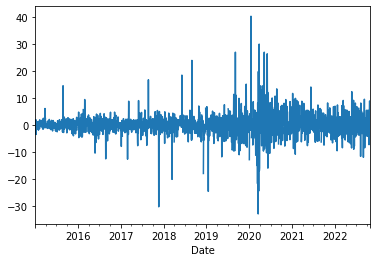

In [19]:
test1 = sig_df.Close.pct_change()
# Scale by 100 to get percentages
test1 = 100 * test1.asfreq("B")
fig, ax = plt.subplots()
ax = test1.plot(ax=ax)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

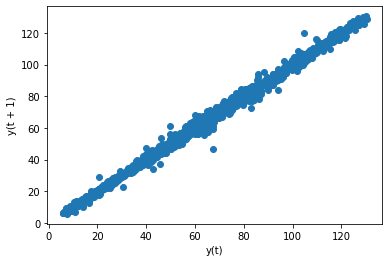

In [20]:
lag_plot(sig_df.Close)

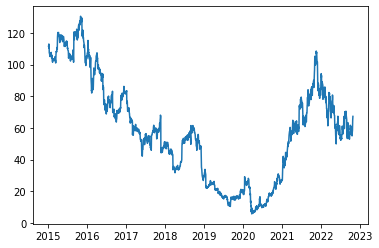

In [21]:
plt.plot(sig_df.index , sig_df['Close'])

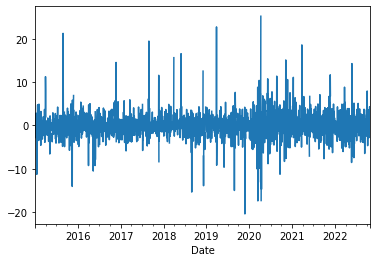

In [22]:
test2 = mov_df.Close.pct_change()
# Scale by 100 to get percentages
test2 = 100 * test2.asfreq("B")
fig, ax = plt.subplots()
ax = test2.plot(ax=ax)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

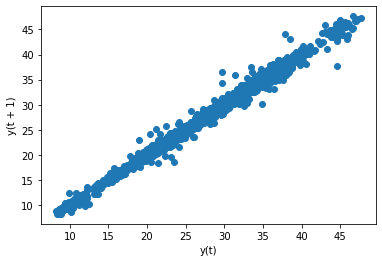

In [23]:
lag_plot(mov_df.Close)

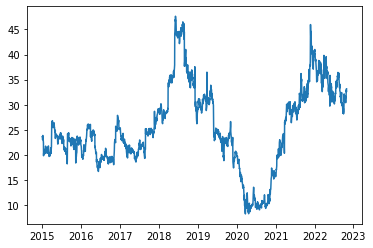

In [24]:
plt.plot(mov_df.index , mov_df['Close'])

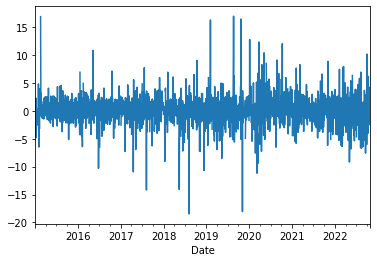

In [25]:
test3 = pan_df.Close.pct_change()
# Scale by 100 to get percentages
test3 = 100 * test3.asfreq("B")
fig, ax = plt.subplots()
ax = test3.plot(ax=ax)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

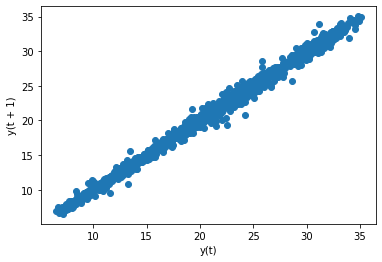

In [26]:
lag_plot(pan_df.Close)

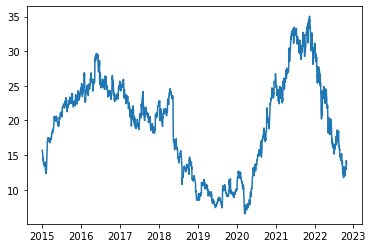

In [27]:
plt.plot(pan_df.index , pan_df['Close'])

In [ ]:
# I only need the last 200 days from the close column

In [28]:
sig1 = pd.DataFrame(sig_df[-200:]['Close'])
sig1

,Close
Date,
2022-01-13,89.191582
2022-01-14,88.489746
2022-01-18,87.155281
2022-01-19,86.404045
2022-01-20,78.080940
...,...
2022-10-24,58.669312
2022-10-25,63.843380
2022-10-26,64.940002


In [30]:
from statsmodels.tsa.stattools import adfuller
 #creating a function for values 
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)


In [31]:
 #printing for AvgTemp
adf_test(sig1['Close'])

1. ADF :  -2.7482385614207527
2. P-Value :  0.06605634331160291
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 199
5. Critical Values :
	 1% :  -3.4636447617687436
	 5% :  -2.8761761179270766
	 10% :  -2.57457158581854


In [63]:
from statsmodels.tsa.ar_model import AutoReg

train, test = sig1.Close[:150], sig1.Close[50:]

auto_reg_model = AutoReg(train, lags=30)
a_model_fit = auto_reg_model.fit()

a_predictions = a_model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

a_predictions.index = test.index # Need to reset index

a_predictions

C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Date
2022-03-28    68.452622
2022-03-29    67.079605
2022-03-30    65.720609
2022-03-31    66.840658
2022-04-01    66.997914
                ...    
2022-10-24    62.890206
2022-10-25    62.888687
2022-10-26    62.889590
2022-10-27    62.889420
2022-10-28    62.887584
Length: 150, dtype: float64

In [54]:
pd.DataFrame({'observed':sig1.Close[50:].values, 'predicted':a_predictions})

,observed,predicted
Date,,
2022-03-28,75.522781,68.452622
2022-03-29,79.733353,67.079605
2022-03-30,75.225563,65.720609
2022-03-31,72.025528,66.840658
2022-04-01,70.281860,66.997914
...,...,...
2022-10-24,58.669312,62.890206
2022-10-25,63.843380,62.888687
2022-10-26,64.940002,62.889590


In [64]:
#printing predictions for next 30 days
index_future_dates=pd.date_range(start='2022-10-29',end='2022-11-28')

#print(index_future_dates)
pred=a_model_fit.predict(start=len(test),end=len(test)+30).rename('Predictions')

#print(comp_pred)
pred.index=index_future_dates
print(pred)

2022-10-29    68.452622
2022-10-30    67.079605
2022-10-31    65.720609
2022-11-01    66.840658
2022-11-02    66.997914
2022-11-03    66.038577
2022-11-04    65.737365
2022-11-05    65.912459
2022-11-06    64.484007
2022-11-07    64.654252
2022-11-08    63.739424
2022-11-09    63.581828
2022-11-10    62.376131
2022-11-11    63.629059
2022-11-12    63.084073
2022-11-13    64.050752
2022-11-14    63.681542
2022-11-15    64.666182
2022-11-16    63.967599
2022-11-17    63.520543
2022-11-18    63.804683
2022-11-19    63.603205
2022-11-20    63.241603
2022-11-21    63.846101
2022-11-22    64.199891
2022-11-23    64.258852
2022-11-24    64.435770
2022-11-25    64.162463
2022-11-26    63.657957
2022-11-27    63.942381
2022-11-28    63.855644
Freq: D, Name: Predictions, dtype: float64


C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [46]:
test

Date
2022-06-08    61.795166
2022-06-09    67.388527
2022-06-10    61.268620
2022-06-13    58.009964
2022-06-14    60.672523
                ...    
2022-10-24    58.669312
2022-10-25    63.843380
2022-10-26    64.940002
2022-10-27    66.199997
2022-10-28    67.290001
Name: Close, Length: 100, dtype: float64

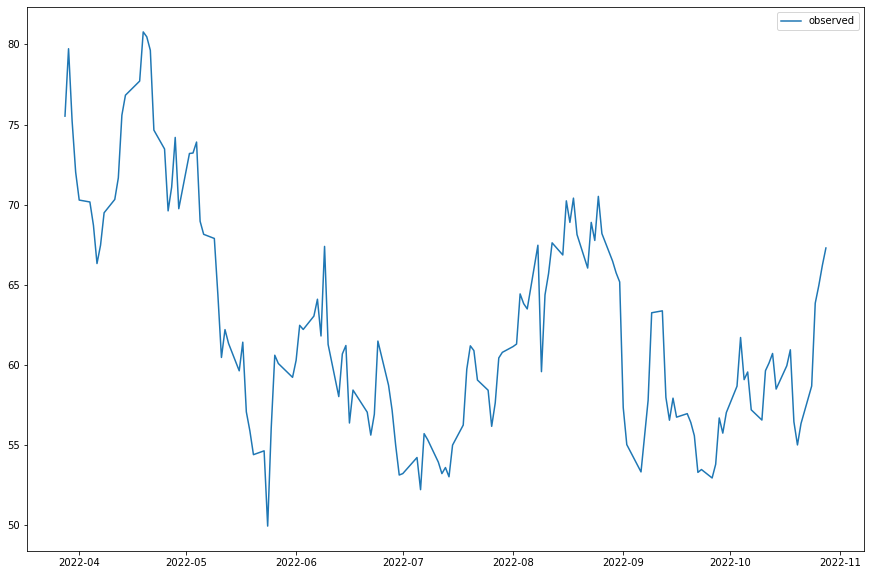

In [89]:
plt.figure(figsize=(15,10))
#plt.plot(pred, label='predictions')

plt.plot(test, label = 'observed')
plt.legend()
plt.show()

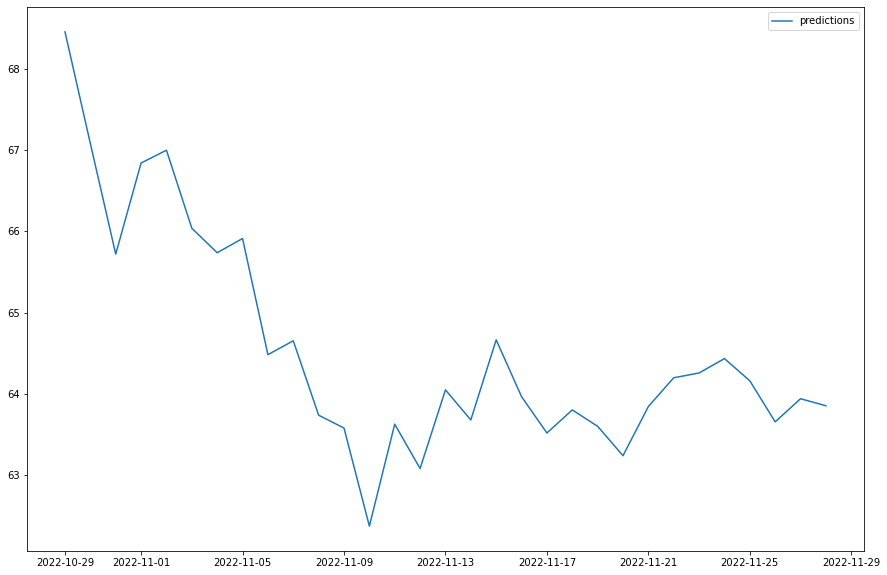

In [90]:
plt.figure(figsize=(15,10))
plt.plot(pred, label='predictions')
plt.legend()
plt.show()

In [58]:
mov1 = pd.DataFrame(mov_df[-200:]['Close'])
mov1

,Close
Date,
2022-01-13,38.485992
2022-01-14,37.729084
2022-01-18,36.739277
2022-01-19,36.516087
2022-01-20,35.176937
...,...
2022-10-24,31.620001
2022-10-25,32.990002
2022-10-26,32.939999


In [59]:
adf_test(mov1['Close'])

1. ADF :  -2.0585537812091865
2. P-Value :  0.2615034203729774
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 197
5. Critical Values :
	 1% :  -3.463987334463603
	 5% :  -2.8763259091636213
	 10% :  -2.5746515171738515


In [66]:
train1, test1 = mov1.Close[:150], mov1.Close[50:]

model1 = AutoReg(train1, lags=30)
model_fit1 = model1.fit()

pred1 = model_fit1.predict(start=len(train1), end=len(train1)+len(test1)-1, dynamic=False)

pred1.index = test1.index # Needs to reset index

pred1

C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Date
2022-03-28    36.206261
2022-03-29    35.492896
2022-03-30    34.929030
2022-03-31    35.113903
2022-04-01    34.709715
                ...    
2022-10-24    34.024577
2022-10-25    34.024282
2022-10-26    34.021488
2022-10-27    34.020790
2022-10-28    34.019619
Length: 150, dtype: float64

In [68]:

#print(index_future_dates)
pred_1 = model_fit1.predict(start=len(test1),end=len(test1)+30).rename('Predictions')

#print(comp_pred)
pred_1.index=index_future_dates
print(pred_1)

2022-10-29    36.206261
2022-10-30    35.492896
2022-10-31    34.929030
2022-11-01    35.113903
2022-11-02    34.709715
2022-11-03    34.531782
2022-11-04    34.498005
2022-11-05    34.515466
2022-11-06    34.243218
2022-11-07    34.466859
2022-11-08    34.338648
2022-11-09    34.243764
2022-11-10    34.101119
2022-11-11    33.868794
2022-11-12    34.016874
2022-11-13    33.582077
2022-11-14    33.651852
2022-11-15    33.803946
2022-11-16    33.530495
2022-11-17    33.720016
2022-11-18    33.786170
2022-11-19    33.800089
2022-11-20    33.593459
2022-11-21    33.855698
2022-11-22    33.724379
2022-11-23    33.848637
2022-11-24    33.937924
2022-11-25    33.980369
2022-11-26    34.064491
2022-11-27    34.171256
2022-11-28    34.290277
Freq: D, Name: Predictions, dtype: float64


C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


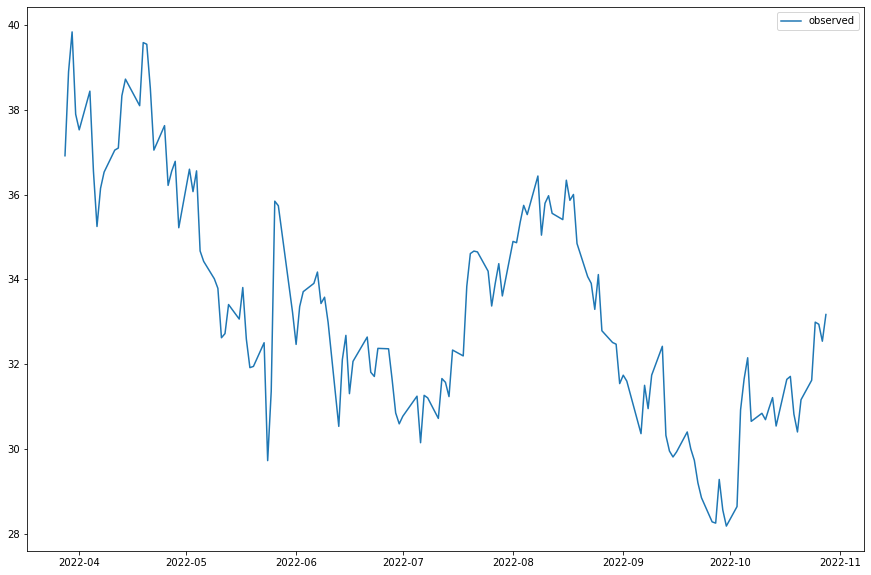

In [91]:
plt.figure(figsize=(15,10))
# plt.plot(pred_1, label='predictions')

plt.plot(test1, label = 'observed')
plt.legend()
plt.show()

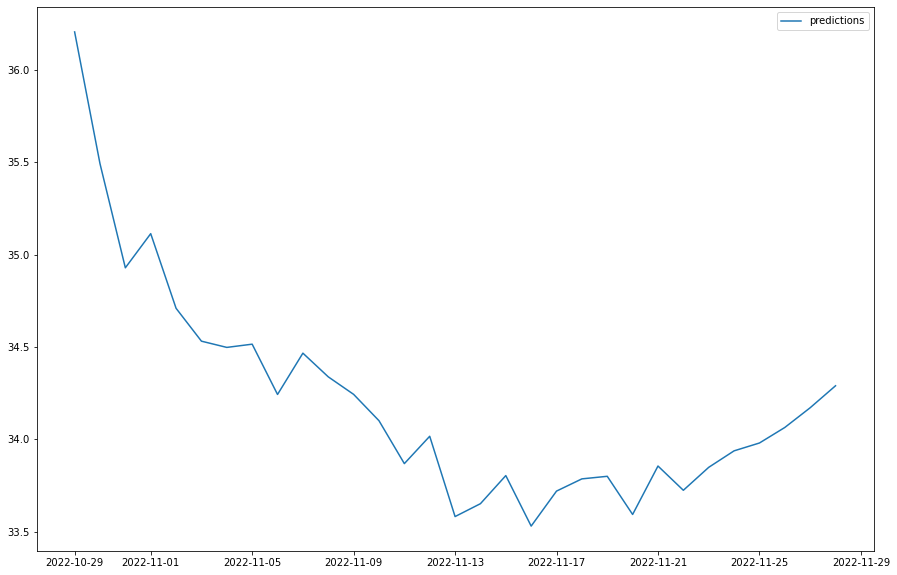

In [93]:
plt.figure(figsize=(15,10))
plt.plot(pred_1, label='predictions')
plt.legend()
plt.show()

In [70]:
pan1 = pd.DataFrame(pan_df[-200:]['Close'])
pan1

,Close
Date,
2022-01-13,29.477190
2022-01-14,28.534464
2022-01-18,28.427557
2022-01-19,29.146749
2022-01-20,29.156469
...,...
2022-10-24,13.160000
2022-10-25,13.710000
2022-10-26,14.220000


In [71]:
adf_test(pan1['Close'])

1. ADF :  -1.8056995779098888
2. P-Value :  0.37763570550018155
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 199
5. Critical Values :
	 1% :  -3.4636447617687436
	 5% :  -2.8761761179270766
	 10% :  -2.57457158581854


In [80]:
train2, test2 = pan1.Close[:150], pan1.Close[50:]

model2 = AutoReg(train2, lags=30)
model_fit2 = model2.fit()

pred2 = model_fit2.predict(start=len(train2), end=len(train2)+len(test2)-1, dynamic=False)

pred2.index = test2.index # Needs to reset index

pred2

C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Date
2022-03-28    15.670474
2022-03-29    15.731534
2022-03-30    15.918358
2022-03-31    16.216215
2022-04-01    16.300638
                ...    
2022-10-24    16.034496
2022-10-25    16.030187
2022-10-26    16.023768
2022-10-27    16.024918
2022-10-28    16.031848
Length: 150, dtype: float64

In [81]:
#print(index_future_dates)
pred_2 = model_fit2.predict(start=len(test2),end=len(test2)+30).rename('Predictions')

#print(comp_pred)
pred_2.index=index_future_dates
print(pred_2)

2022-10-29    15.670474
2022-10-30    15.731534
2022-10-31    15.918358
2022-11-01    16.216215
2022-11-02    16.300638
2022-11-03    16.282427
2022-11-04    16.102007
2022-11-05    16.013115
2022-11-06    16.185330
2022-11-07    16.319085
2022-11-08    16.640517
2022-11-09    16.352899
2022-11-10    16.257800
2022-11-11    16.783662
2022-11-12    16.723760
2022-11-13    17.156222
2022-11-14    16.732081
2022-11-15    16.701149
2022-11-16    17.107416
2022-11-17    17.040718
2022-11-18    17.114755
2022-11-19    16.811423
2022-11-20    16.769628
2022-11-21    16.663718
2022-11-22    16.583806
2022-11-23    16.549920
2022-11-24    16.506905
2022-11-25    16.671302
2022-11-26    16.679940
2022-11-27    16.523397
2022-11-28    16.282372
Freq: D, Name: Predictions, dtype: float64


C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\13306\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


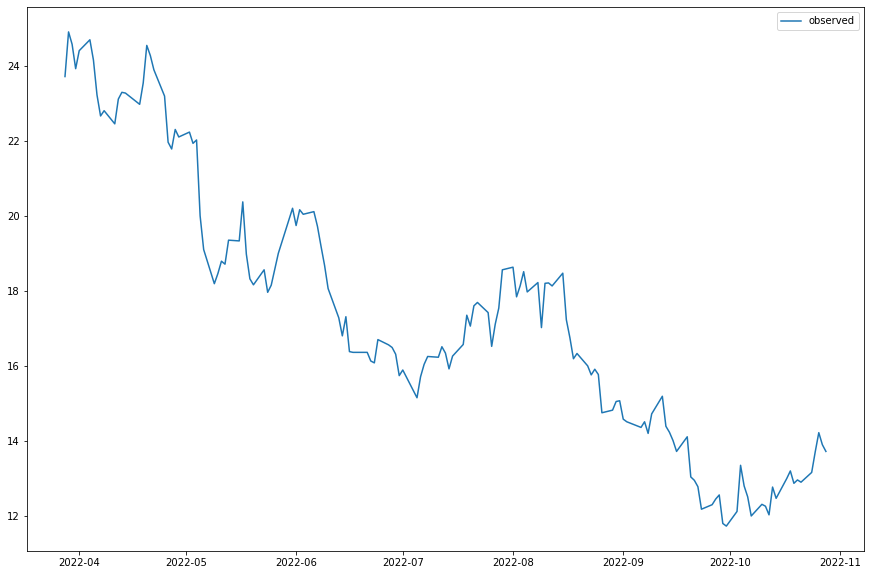

In [92]:
plt.figure(figsize=(15,10))
#plt.plot(pred_2, label='predictions')

plt.plot(test2, label = 'observed')
plt.legend()
plt.show()

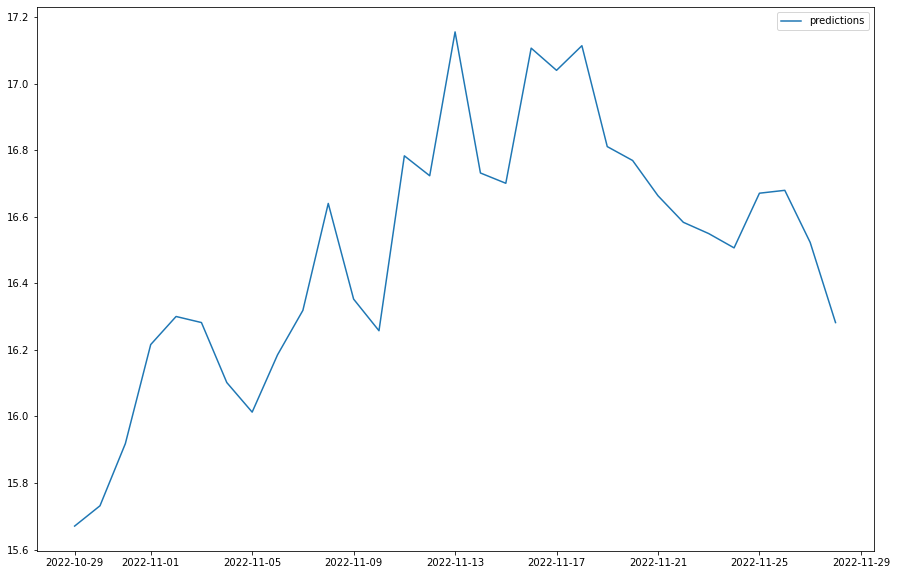

In [94]:
plt.figure(figsize=(15,10))
plt.plot(pred_2, label='predictions')
plt.legend()
plt.show()

In [77]:
pred_1

2022-10-29    36.206261
2022-10-30    35.492896
2022-10-31    34.929030
2022-11-01    35.113903
2022-11-02    34.709715
2022-11-03    34.531782
2022-11-04    34.498005
2022-11-05    34.515466
2022-11-06    34.243218
2022-11-07    34.466859
2022-11-08    34.338648
2022-11-09    34.243764
2022-11-10    34.101119
2022-11-11    33.868794
2022-11-12    34.016874
2022-11-13    33.582077
2022-11-14    33.651852
2022-11-15    33.803946
2022-11-16    33.530495
2022-11-17    33.720016
2022-11-18    33.786170
2022-11-19    33.800089
2022-11-20    33.593459
2022-11-21    33.855698
2022-11-22    33.724379
2022-11-23    33.848637
2022-11-24    33.937924
2022-11-25    33.980369
2022-11-26    34.064491
2022-11-27    34.171256
2022-11-28    34.290277
Freq: D, Name: Predictions, dtype: float64

In [78]:
pred_2

2022-10-29    36.206261
2022-10-30    35.492896
2022-10-31    34.929030
2022-11-01    35.113903
2022-11-02    34.709715
2022-11-03    34.531782
2022-11-04    34.498005
2022-11-05    34.515466
2022-11-06    34.243218
2022-11-07    34.466859
2022-11-08    34.338648
2022-11-09    34.243764
2022-11-10    34.101119
2022-11-11    33.868794
2022-11-12    34.016874
2022-11-13    33.582077
2022-11-14    33.651852
2022-11-15    33.803946
2022-11-16    33.530495
2022-11-17    33.720016
2022-11-18    33.786170
2022-11-19    33.800089
2022-11-20    33.593459
2022-11-21    33.855698
2022-11-22    33.724379
2022-11-23    33.848637
2022-11-24    33.937924
2022-11-25    33.980369
2022-11-26    34.064491
2022-11-27    34.171256
2022-11-28    34.290277
Freq: D, Name: Predictions, dtype: float64

In [79]:
pred

2022-10-29    68.452622
2022-10-30    67.079605
2022-10-31    65.720609
2022-11-01    66.840658
2022-11-02    66.997914
2022-11-03    66.038577
2022-11-04    65.737365
2022-11-05    65.912459
2022-11-06    64.484007
2022-11-07    64.654252
2022-11-08    63.739424
2022-11-09    63.581828
2022-11-10    62.376131
2022-11-11    63.629059
2022-11-12    63.084073
2022-11-13    64.050752
2022-11-14    63.681542
2022-11-15    64.666182
2022-11-16    63.967599
2022-11-17    63.520543
2022-11-18    63.804683
2022-11-19    63.603205
2022-11-20    63.241603
2022-11-21    63.846101
2022-11-22    64.199891
2022-11-23    64.258852
2022-11-24    64.435770
2022-11-25    64.162463
2022-11-26    63.657957
2022-11-27    63.942381
2022-11-28    63.855644
Freq: D, Name: Predictions, dtype: float64

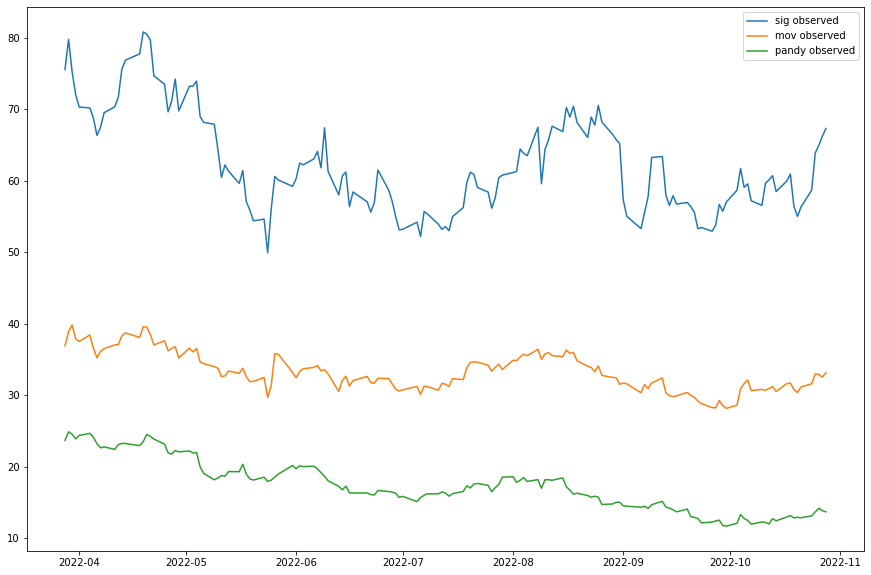

In [107]:
plt.figure(figsize=(15,10))
plt.plot(test, label = 'sig observed')
plt.plot(test1, label = 'mov observed')
plt.plot(test2, label = 'pandy observed')
plt.legend()
plt.show()

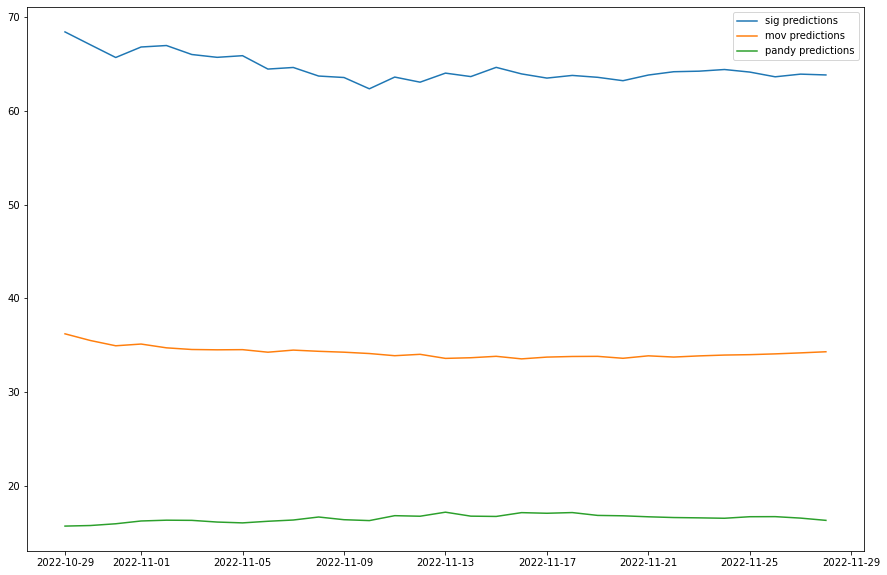

In [97]:
plt.figure(figsize=(15,10))
plt.plot(pred, label='sig predictions')
plt.plot(pred_1, label='mov predictions')
plt.plot(pred_2, label='pandy predictions')
plt.legend()
plt.show()

In [ ]:
# I wanted to use more graphs to further explain my story but I had many problems as you can see below

<Figure size 1080x720 with 0 Axes>

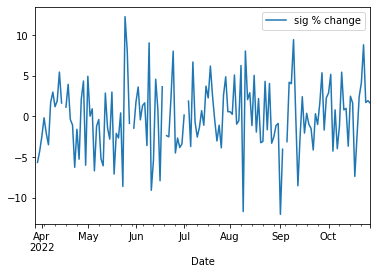

In [148]:
plt.figure(figsize=(15,10))

sig_pc = test[1:].pct_change()
sig_pc = sig_pc.rename({'Close': 'sig % change'}, axis=1)
# Scale by 100 to get percentages
sig_gr = 100 * sig_pc.asfreq("B")
fig, ax = plt.subplots()
ax = sig_gr.plot(ax=ax)
#plt.subplots(sig_gr, label='sig % change')

# mov_pc = test1[1:].pct_change()
# mov_pc.columns = ['Date','mov % change' ]
# # Scale by 100 to get percentages
# mov_gr = 100 * mov_pc.asfreq("B")
# fig1, ax1 = plt.subplots()
# ax1 = mov_gr.plot(ax=ax1)
# # plt.subplots(mov_gr, label='sig % change')

# pandy_pc = test2[1:].pct_change()
# pandy_pc.columns = ['Date','pandy % change' ]
# # Scale by 100 to get percentages
# pandy_gr = 100 * pandy_pc.asfreq("B")
# fig2, ax2 = plt.subplots()
# ax2 = pandy_gr.plot(ax=ax2)



plt.legend()
plt.show()

In [203]:
#test.index & test[1:]
pd.set_option('display.max_rows', None)
pred_2

2022-10-29    15.670474
2022-10-30    15.731534
2022-10-31    15.918358
2022-11-01    16.216215
2022-11-02    16.300638
2022-11-03    16.282427
2022-11-04    16.102007
2022-11-05    16.013115
2022-11-06    16.185330
2022-11-07    16.319085
2022-11-08    16.640517
2022-11-09    16.352899
2022-11-10    16.257800
2022-11-11    16.783662
2022-11-12    16.723760
2022-11-13    17.156222
2022-11-14    16.732081
2022-11-15    16.701149
2022-11-16    17.107416
2022-11-17    17.040718
2022-11-18    17.114755
2022-11-19    16.811423
2022-11-20    16.769628
2022-11-21    16.663718
2022-11-22    16.583806
2022-11-23    16.549920
2022-11-24    16.506905
2022-11-25    16.671302
2022-11-26    16.679940
2022-11-27    16.523397
2022-11-28    16.282372
Freq: D, Name: Predictions, dtype: float64

In [208]:
pred_2.min()

15.670474439812118